In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy.stats as sc
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss # multi-class logarithmic loss
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [15]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

In [16]:
train_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [17]:
test_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [18]:
sample_sub.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [21]:
train_data.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [22]:
train_data.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [23]:
patients = train_data.copy().drop(columns=['id'])
variables = patients.columns.tolist()
variables.pop() # getting rid of the target 'Status'
target = train_data['Status']

feat_num = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol',
            'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
            'Tryglicerides', 'Platelets', 'Prothrombin']

feat_cat = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
            'Spiders', 'Edema', 'Stage']

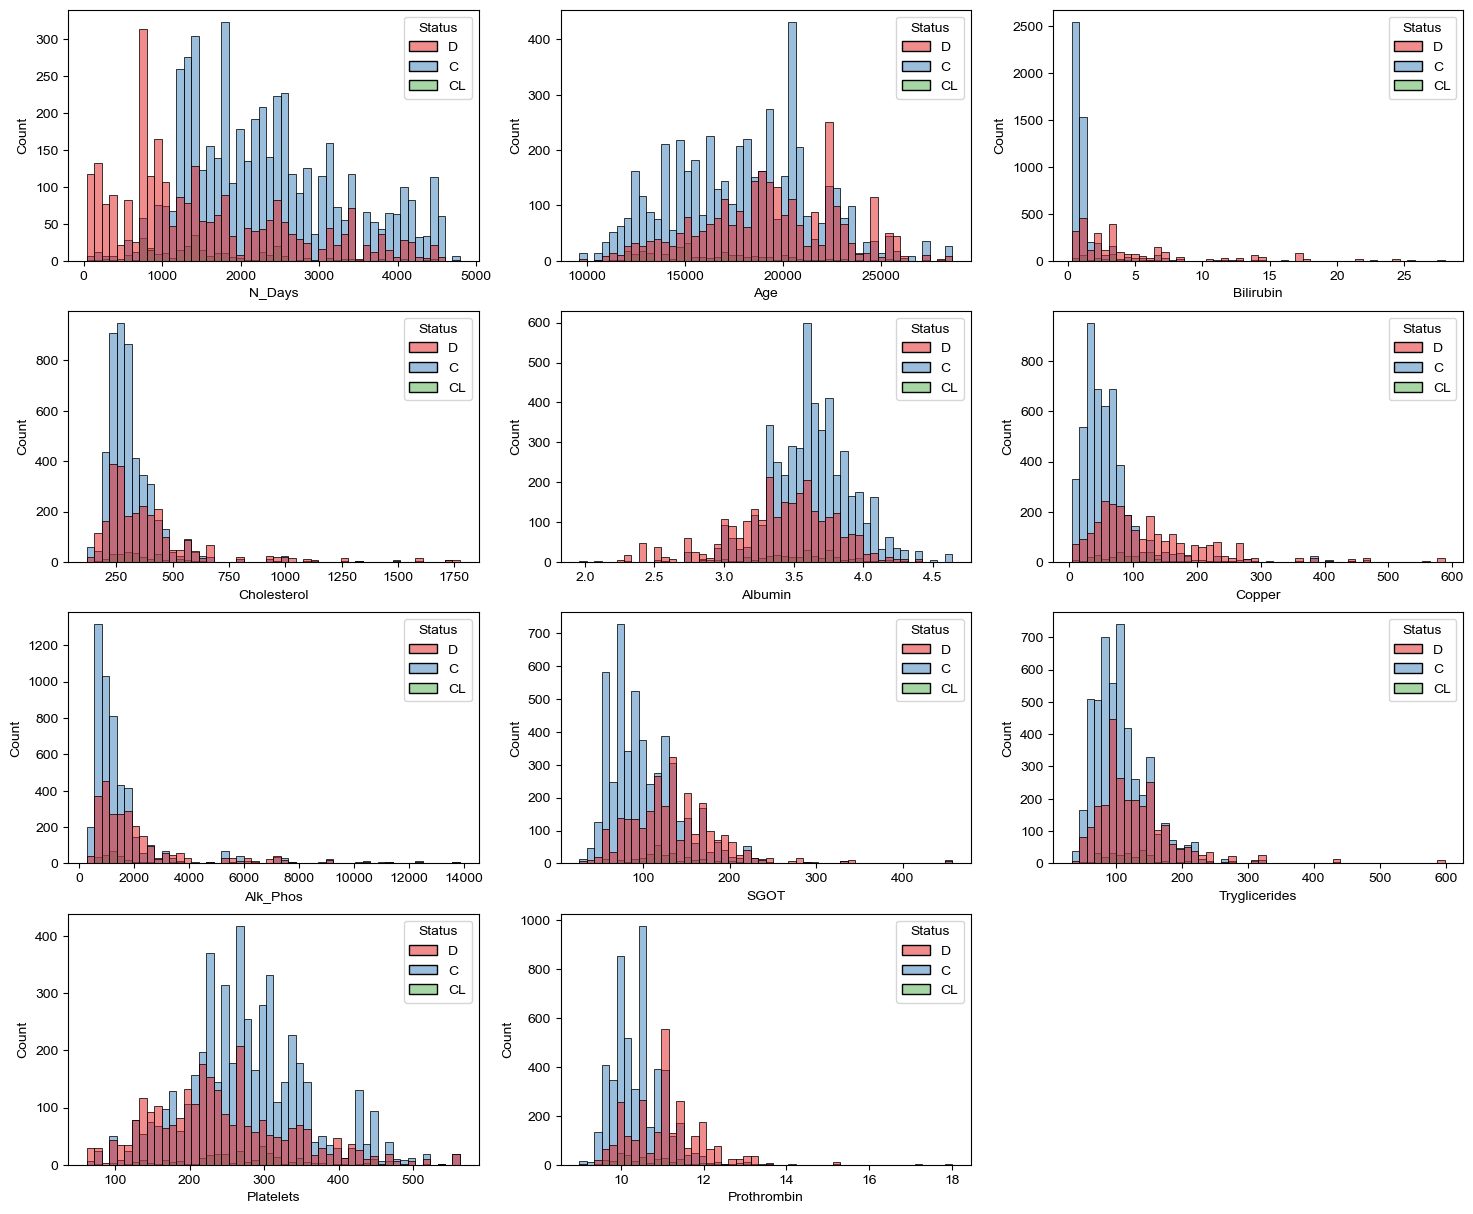

In [24]:
fig, axes = plt.subplots(nrows= 4, ncols=3, figsize=(18,15))

for feat, ax in zip(feat_num, axes.ravel()):
    sns.histplot(data=patients, x=feat, bins=50, ax=ax, hue='Status', palette='Set1')
axes[-1, -1].set_visible(False)

sns.set(style='darkgrid')
plt.grid ( True )
plt.show()

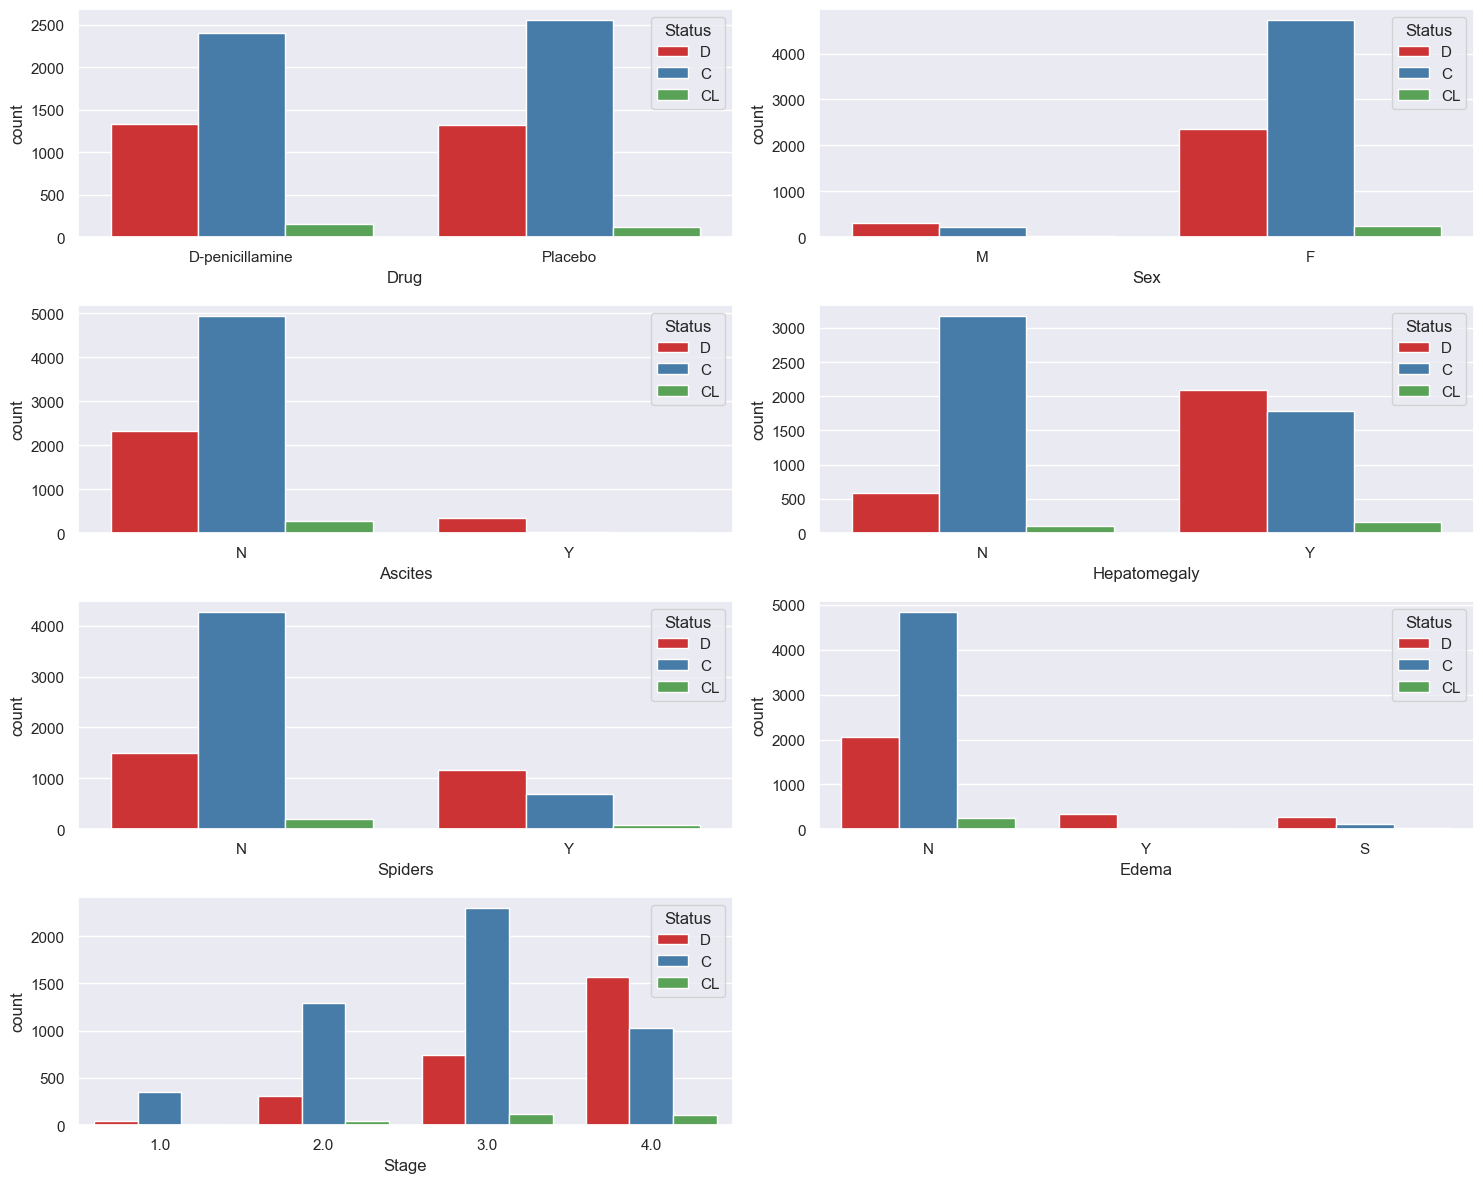

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))
for feat, ax in zip(feat_cat, axes.ravel()):
    sns.countplot(data=patients, x=feat, ax=ax, hue='Status', palette='Set1')
axes[-1, -1].set_visible(False)


plt.tight_layout()
plt.show()

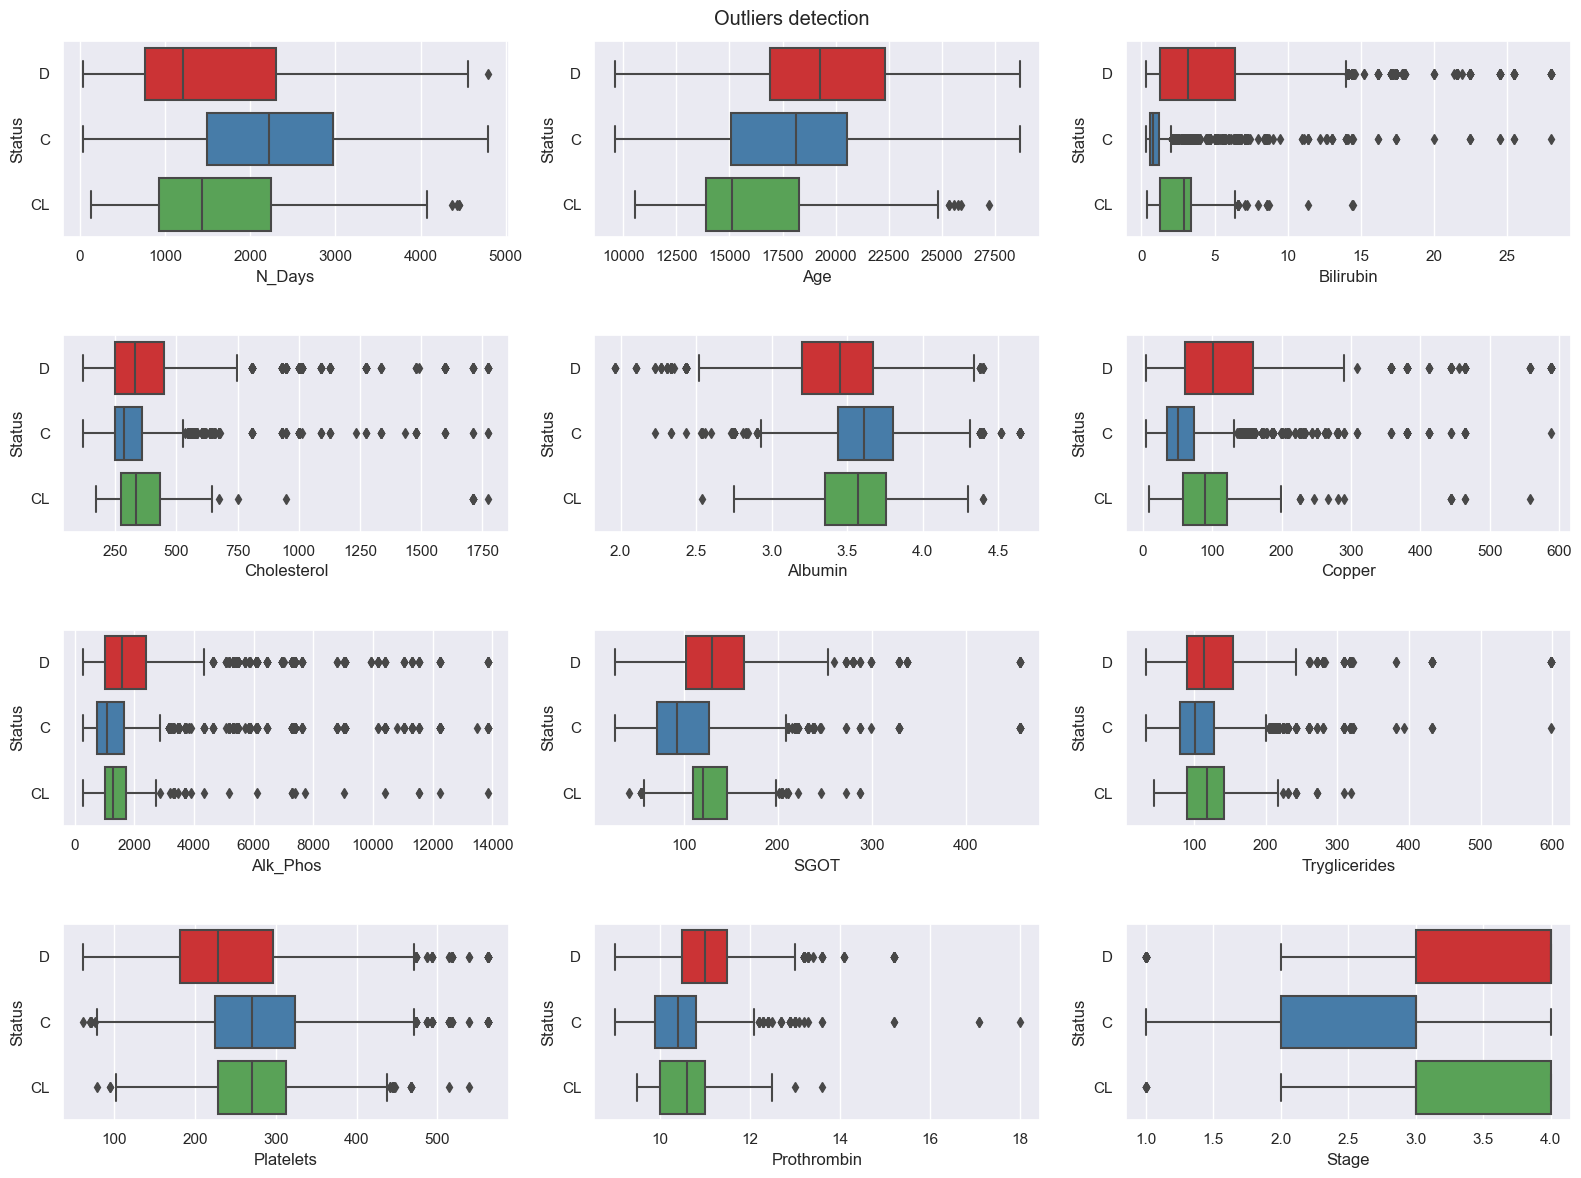

In [26]:
not_object = patients.select_dtypes(exclude='object')

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,12))
for feat, ax in zip(not_object, axes.ravel()):
    sns.boxplot(data=patients, x=feat, y='Status', ax=ax, palette='Set1')
    
plt.suptitle('Outliers detection')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

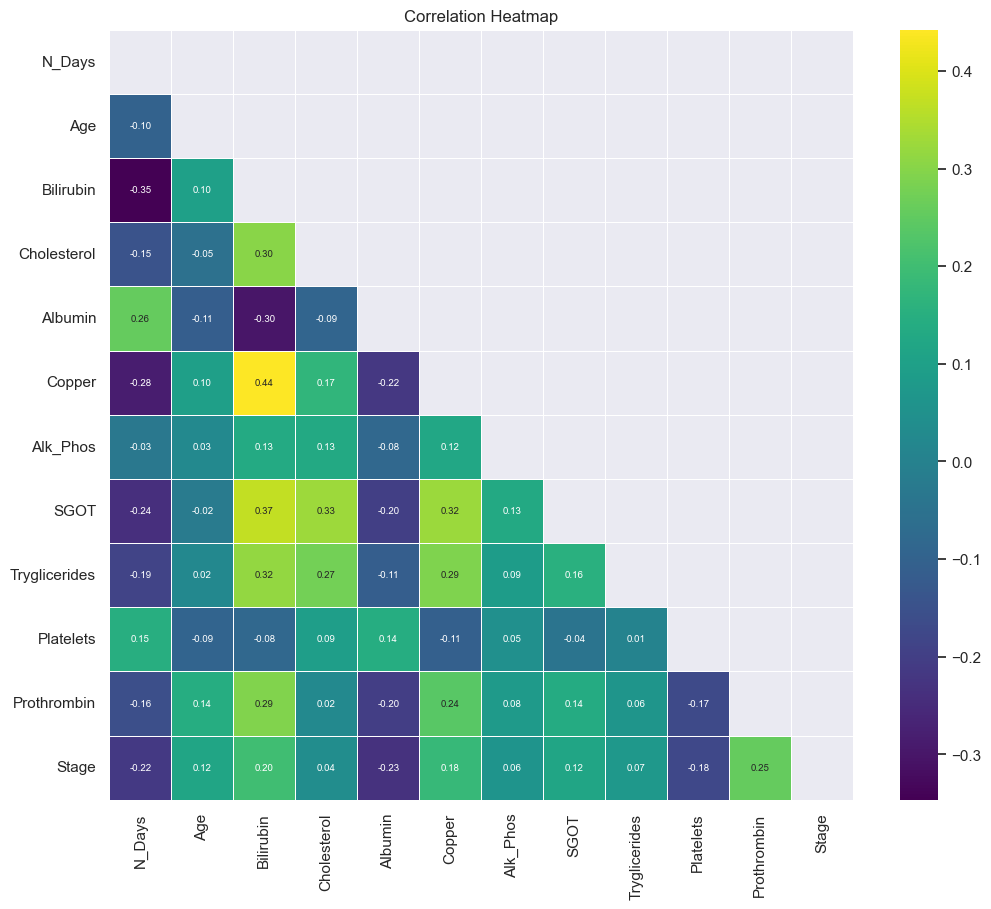

In [27]:
not_object = patients.select_dtypes(exclude='object')
patients_corr = patients[not_object.columns]

correlation = patients_corr.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, annot_kws={"size": 7}, mask=mask)
plt.title("Correlation Heatmap")

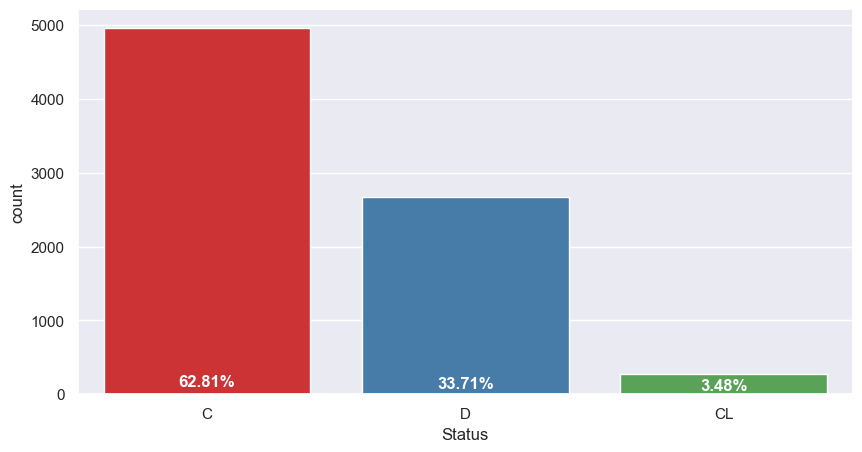

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=patients, x='Status', order=patients['Status'].value_counts().index, palette='Set1')
class_weight = (patients['Status'].value_counts(normalize=True)*100).round(2).tolist()

for idx, value in enumerate(class_weight): # adding percentage
    plt.text(idx, value+50, f'{value:.2f}%', color='white', ha='center', fontweight='bold')

In [29]:
def cat_and_num(df):
    """
    Separates columns of a DataFrame into categorical and numerical lists.

    Parameters:
    - df (DataFrame): The DataFrame to process.

    Returns:
    - Tuple: (categorical_columns, numerical_columns)
    """    
    categorical_columns = [col for col in df.columns if df[col].dtype == "object" if col != 'Status' ]
    
    numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
    
    return categorical_columns, numerical_columns

In [30]:
categorical_columns_train , numerical_columns_train = cat_and_num(train_data)

In [31]:
train_data = pd.get_dummies(train_data, columns=categorical_columns_train, drop_first=True, dtype=int)
test_data = pd.get_dummies(test_data, columns=categorical_columns_train, drop_first=True, dtype=int)

In [32]:
train_data['Status'] = train_data['Status'].map({"D":0, "C":1, "CL":2})

In [52]:
train_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
N_Days,999.000000,2574.000000,3428.000000,2576.000000,788.000000,703.000000,1300.000000,1615.000000,2050.000000,2615.000000
Age,0.844485,0.186756,-1.184447,-0.025094,-0.427976,0.234219,-0.225202,0.771450,0.684763,-0.814401
Bilirubin,2.300000,0.900000,3.300000,0.600000,1.100000,0.600000,1.000000,0.600000,0.700000,0.900000
Cholesterol,0.177827,0.522099,0.012546,-0.533636,0.400635,-1.070745,0.292676,-0.249721,0.482248,1.207532
Albumin,-0.718462,-0.153660,-0.121995,-0.276998,0.278302,-0.385726,-0.718462,1.228607,0.278302,0.075345
Copper,1.269664,-0.006273,0.985610,-0.082896,-0.006273,-0.879040,-0.461215,-0.810910,0.191865,-0.654930
Alk_Phos,0.395204,0.283522,-0.321611,0.480839,0.005018,1.705570,0.497809,-1.756055,1.236652,0.555462
SGOT,1.343287,0.565738,0.172731,-0.893908,0.321611,-1.199766,0.662724,-1.824556,-0.239380,1.266860
Tryglicerides,-1.275302,-0.497809,-2.307607,-0.217488,-0.217488,-1.111702,-0.414267,1.750222,0.957454,0.723343


In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5271 non-null   int64  
 1   N_Days          5271 non-null   int64  
 2   Age             5271 non-null   float64
 3   Bilirubin       5271 non-null   float64
 4   Cholesterol     5271 non-null   float64
 5   Albumin         5271 non-null   float64
 6   Copper          5271 non-null   float64
 7   Alk_Phos        5271 non-null   float64
 8   SGOT            5271 non-null   float64
 9   Tryglicerides   5271 non-null   float64
 10  Platelets       5271 non-null   float64
 11  Prothrombin     5271 non-null   float64
 12  Stage           5271 non-null   float64
 13  Drug_Placebo    5271 non-null   int32  
 14  Sex_M           5271 non-null   int32  
 15  Ascites_Y       5271 non-null   int32  
 16  Hepatomegaly_Y  5271 non-null   int32  
 17  Spiders_Y       5271 non-null   i

In [35]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer
import pandas as pd

# Assuming 'train' and 'test' are your dataframes
columns_to_scale = ['Age', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Robust Scaling
robust_scaler = RobustScaler()
train_data[columns_to_scale] = robust_scaler.fit_transform(train_data[columns_to_scale])
test_data[columns_to_scale] = robust_scaler.transform(test_data[columns_to_scale])

# Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='normal')  # 'normal' ensures the transformed data is approximately normal
train_data[columns_to_scale] = quantile_transformer.fit_transform(train_data[columns_to_scale])
test_data[columns_to_scale] = quantile_transformer.transform(test_data[columns_to_scale])

In [36]:
y=train_data['Status']
X=train_data.drop('Status',axis=1)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
rf_classifier = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [40]:
y_pred = best_rf_model.predict(X_test)

In [41]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)
cr=classification_report(y_test, y_pred)
print("Classification report:\n",cr)

Accuracy: 0.8323845667299178
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78       563
           1       0.83      0.94      0.88       966
           2       0.67      0.04      0.07        52

    accuracy                           0.83      1581
   macro avg       0.78      0.57      0.58      1581
weighted avg       0.83      0.83      0.82      1581



In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Define the k-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(
    estimator=knn_classifier,
    param_grid=param_grid_knn,
    cv=3,
    scoring='accuracy',  # Use accuracy as the scoring metric
    n_jobs=-1
)

# Fit the model and perform grid search
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_knn.best_params_)
# Get the best model
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test)

# Calculate and print accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", acc_knn)

# Print classification report
cr_knn = classification_report(y_test, y_pred_knn)
print("Classification report:\n", cr_knn)

Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.715370018975332
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56       563
           1       0.72      0.90      0.80       966
           2       0.00      0.00      0.00        52

    accuracy                           0.72      1581
   macro avg       0.47      0.46      0.45      1581
weighted avg       0.69      0.72      0.69      1581



G:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

from sklearn.svm import SVC
svm_classifier = SVC()

from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression()

classifiers = [GradientBoostingClassifier(),SVC(), LogisticRegression()]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Classifier: {classifier.__class__.__name__}, Accuracy: {acc}")
    cr = classification_report(y_test, y_pred)
    print("Classification report:\n", cr)
    print("\n")

Classifier: GradientBoostingClassifier, Accuracy: 0.8311195445920304
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78       563
           1       0.83      0.93      0.88       966
           2       0.45      0.17      0.25        52

    accuracy                           0.83      1581
   macro avg       0.71      0.61      0.64      1581
weighted avg       0.82      0.83      0.82      1581



Classifier: SVC, Accuracy: 0.7216951296647691
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.36      0.50       563
           1       0.70      0.97      0.81       966
           2       0.00      0.00      0.00        52

    accuracy                           0.72      1581
   macro avg       0.51      0.44      0.44      1581
weighted avg       0.73      0.72      0.68      1581



Classifier: LogisticRegression, Accuracy: 0.7975964579380139
Classifica

G:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs

In [44]:
model = XGBClassifier(n_estimators=500,max_depth=8,learning_rate=0.01,objective="multi:softmax")
model.fit(X_train,y_train)
y_pred = model.predict_proba(X_test) 
y_out = model.predict_proba(test_data)
print(y_out)

[[0.350767   0.6232195  0.0260135 ]
 [0.12228749 0.7175401  0.16017245]
 [0.9206893  0.05760781 0.02170291]
 ...
 [0.14749779 0.8194512  0.03305102]
 [0.01090681 0.97732407 0.01176905]
 [0.62218016 0.3556402  0.0221796 ]]


In [45]:
y_test_pred=best_rf_model.predict(test_data)
prob2=best_rf_model.predict_proba(test_data)

In [46]:
submission=pd.DataFrame(y_out,columns=['Status_C','Status_D','Status_CL'])
submission['id']=test_data['id']
submission=submission[['id','Status_C','Status_D','Status_CL']]
submission.to_csv('submission02.csv',index=False)
submission

,id,Status_C,Status_D,Status_CL
0,7905,0.350767,0.623219,0.026014
1,7906,0.122287,0.717540,0.160172
2,7907,0.920689,0.057608,0.021703
3,7908,0.063592,0.920970,0.015438
4,7909,0.222970,0.747293,0.029737
...,...,...,...,...
5266,13171,0.051100,0.895692,0.053208
5267,13172,0.038912,0.945459,0.015629
5268,13173,0.147498,0.819451,0.033051
5269,13174,0.010907,0.977324,0.011769


In [50]:
import pickle

filename = 'Cirrhosis_Outcomes.pkl'
pickle.dump(best_rf_model, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('Cirrhosis_Outcomes.pkl', 'rb'))